# Introduction

**Summary:** The Jupyter notebook is a document with text, code and results. 

This is a text cell, or more precisely a *markdown* cell.

* Pres <kbd>Enter</kbd> to *edit* the cell.
* Pres <kbd>Ctrl+Enter</kbd> to *run* the cell.
* Pres <kbd>Shift+Enter</kbd> to *run* the cell + advance.

We can make lists:

1. **First** item
2. *Second* item
3. ~~Third~~ item

We can also do LaTeX math, e.g. $\alpha^2$ or

$$
X = \int_0^{\infty} \frac{x}{x+1} dx
$$

In [1]:
# this is a code cell

# let us do some calculations
a = 2
b = 3
c = a+b

# lets print the results (shown below the cell)
print(c)

5


We can now write some more text, and continue with our calculations.

In [2]:
d = c*2
print(d)

10


**Note:** Despite JupyterLab is running in a browser, it is running offline (the path is something like *localhost:8888/lab*).<br>

**Binder:** The exception is if you use *binder*, then JupyterLab wil run in the cloud.

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/lectures-2020/master?urlpath=lab/tree/01/Introduction.ipynb)

# Solve the consumer problem

Consider the following consumer problem:

$$
\begin{aligned}
V(p_{1},p_{2},I) & = \max_{x_{1},x_{2}} x_{1}^{\alpha}x_{2}^{1-\alpha}\\
 & \text{s.t.}\\
p_{1}x_{1}+p_{2}x_{2} & \leq I,\,\,\,p_{1},p_{2},I>0\\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

We can solve this problem _numerically_ in a few lines of code.

1. Choose some **parameters**:

In [3]:
alpha = 0.5
I = 10
p1 = 1
p2 = 2

2. The **consumer objective** is:

In [4]:
def value_of_choice(x1,alpha,I,p1,p2):
    
    # a. all income not spent on the first good
    #    is spent on the second
    x2 = (I-p1*x1)/p2 
    
    # b. the resulting utility is
    utility = x1**alpha * x2**(1-alpha)
    
    return utility

3. We can now use a function from the *scipy* module to **solve the consumer problem**.

In [5]:
# a. load external module from scipy
from scipy import optimize

# b. make value-of-choice as a funciton of only x1 
obj = lambda x1: -value_of_choice(x1,alpha,I,p1,p2)

# c. call minimizer
solution = optimize.minimize_scalar(obj,bounds=(0,I/p1))

# d. print result
x1 = solution.x
x2 = (I-x1*p1)/p2
print(x1,x2)

5.000000000088435 2.4999999999557825


**Task**: Solve the consumer problem with the CES utility funciton.

$$
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta}
$$

In [6]:
import numpy as np

# a. choose parameters
alpha = 0.5
beta = 0.000001
I = 10
p1 = 1
p2 = 2

# b. value-of-choice
def value_of_choice_ces(x1,alpha,beta,I,p1,p2):
    x2 = (I-p1*x1)/p2
    if x1 > 0 and x2 > 0:
        utility = (alpha*x1**(-beta)+(1-alpha)*x2**(-beta))**(-1/beta) 
    else:
        utility = 0
    return utility

# c. objective
obj = lambda x1: -value_of_choice_ces(x1,alpha,beta,I,p1,p2)

# d. solve
solution = optimize.minimize_scalar(obj,bounds=(0,I/p1))

# e. result
x1 = solution.x
x2 = (I-x1*p1)/p2
print(x1,x2)

4.711509414276821 2.6442452928615894


# Simulate the AS-AD model

Consider the following AS-AD model:

$$
\begin{aligned}
\hat{y}_{t} &= b\hat{y}_{t-1}+\beta(z_{t}-z_{t-1})-a\beta s_{t}+a\beta\phi s_{t-1} \\
\hat{\pi}_{t} &= b\hat{\pi}_{t-1}+\beta\gamma z_{t}-\beta\phi\gamma z_{t}+\beta s_{t}-\beta\phi s_{t-1} \\
z_{t} &= \delta z_{t-1}+x_{t}, x_{t} \sim N(0,\sigma_x^2) \\
s_{t} &= \omega s_{t-1}+c_{t}, c_{t} \sim N(0,\sigma_c^2) \\
b &= \frac{1+a\phi\gamma}{1+a\gamma} \\
\beta &= \frac{1}{1+a\gamma}
\end{aligned}
$$

where $\hat{y}_{t}$ is the output gap, $\hat{\pi}_{t}$ is the inflation gap, $z_{t}$ is a AR(1) demand shock, and $\hat{s}_{t}$ is a AR(1) supply shock.

1. Choose **parameters**:

In [7]:
a = 0.4
gamma = 0.1
phi = 0.9
delta = 0.8
omega = 0.15
sigma_x = 1
sigma_c = 0.4
T = 100

2. Calculate **composite parameters**:

In [8]:
b = (1+a*phi*gamma)/(1+a*gamma)
beta = 1/(1+a*gamma) 

3. Define **model functions**:

In [9]:
y_hat_func = lambda y_hat_lag,z,z_lag,s,s_lag: b*y_hat_lag + beta*(z-z_lag) - a*beta*s + a*beta*phi*s_lag
pi_hat_func = lambda pi_lag,z,z_lag,s,s_lag: b*pi_lag + beta*gamma*z - beta*phi*gamma*z_lag + beta*s - beta*phi*s_lag
z_func = lambda z_lag,x: delta*z_lag + x
s_func = lambda s_lag,c: omega*s_lag + c

4. Run the **simulation**:

In [10]:
import numpy as np

# a. set setup
np.random.seed(2015)   

# b. allocate simulation data
x = np.random.normal(loc=0,scale=sigma_x,size=T)
c = np.random.normal(loc=0,scale=sigma_c,size=T)
z = np.zeros(T)
s = np.zeros(T)
y_hat = np.zeros(T)
pi_hat = np.zeros(T)

# c. run simulation
for t in range(1,T):

    # i. update z and s
    z[t] = z_func(z[t-1],x[t])
    s[t] = s_func(s[t-1],c[t])

    # ii. compute y og pi 
    y_hat[t] = y_hat_func(y_hat[t-1],z[t],z[t-1],s[t],s[t-1])
    pi_hat[t] = pi_hat_func(pi_hat[t-1],z[t],z[t-1],s[t],s[t-1])

5. **Plot** the simulation:

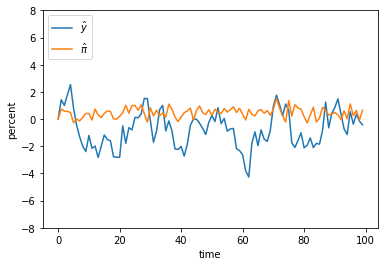

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat,label='$\\hat{y}$')
ax.plot(pi_hat,label='$\\hat{\pi}$')

ax.set_xlabel('time')

ax.set_ylabel('percent')
ax.set_ylim([-8,8])

ax.legend(loc='upper left');

I like the **seaborn style**:

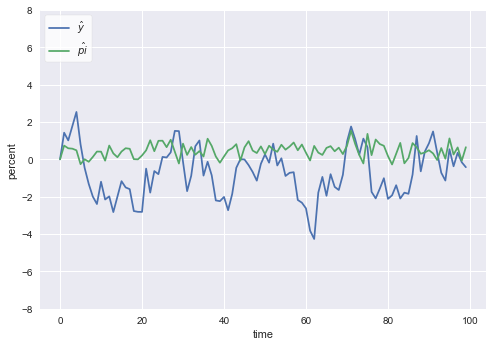

In [12]:
plt.style.use('seaborn')

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(y_hat,label='$\\hat{y}$')
ax.plot(pi_hat,label='$\\hat{pi}$')

ax.set_xlabel('time')

ax.set_ylabel('percent')
ax.set_ylim([-8,8])

ax.legend(loc='upper left',facecolor='white',frameon='True');

# Using modules

A **module** is a **.py**-file with functions you import and can then call in the notebook.

Try to open **mymodule.py** and have a look.

In [13]:
import mymodule

In [14]:
x = 5
y = mymodule.myfunction(x)
print(y)

25
